# Big Data - Project

## Data analysis

### Dragan Postolovsky
### Wojciech Taisner

In [1]:
import dask.dataframe as dd
import pandas as pd
import numpy as np
from plotnine import *

In [2]:
#posts = dd.read_csv("Complete-Posts-Compressed/*.tar.xz", compression="xz")
posts = dd.read_csv("Complete-Posts/*.csv")

In [3]:
#posts.astype(float).corr().compute()#["isAnswered"]

In [4]:
#posts.astype(float).describe().compute()

## Warning: in memory computations

In [5]:
df = posts.compute()

In [6]:
## remove outliers
df = df.loc[df["AnswerCount"]<25]
df = df.loc[df["BlocksCount"]<10]
df = df.loc[df["LinksCount"]<10]

In [7]:
df.describe()

Score     ViewCount     WordCount    LinksCount   BlocksCount  \
count  1.641965e+07  1.641965e+07  1.641965e+07  1.641965e+07  1.641965e+07   
mean   1.920363e+00  2.109085e+03  8.911707e+01  2.949882e-01  1.999033e+00   
std    2.620062e+01  1.443399e+04  6.360844e+01  7.007091e-01  1.984313e+00   
min   -1.850000e+02  1.000000e+00  2.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  7.700000e+01  4.800000e+01  0.000000e+00  1.000000e+00   
50%    0.000000e+00  2.720000e+02  7.400000e+01  0.000000e+00  1.000000e+00   
75%    1.000000e+00  9.620000e+02  1.110000e+02  0.000000e+00  3.000000e+00   
max    2.225200e+04  3.913031e+06  8.020000e+03  9.000000e+00  9.000000e+00   

       TitleWordsCount   AnswerCount  CommentCount    Reputation  \
count     1.641965e+07  1.641965e+07  1.641965e+07  1.641965e+07   
mean      8.576060e+00  1.536222e+00  1.969255e+00  2.435449e+03   
std       3.603330e+00  1.366787e+00  2.661569e+00  1.176781e+04   
min       1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%       6.000000e+00  1.000000e+00  0.000000e+00  2.500000e+01   
50%       8.000000e+00  1.000000e+00  1.000000e+00  1.770000e+02   
75%       1.100000e+01  2.000000e+00  3.000000e+00  1.204000e+03   
max       4.500000e+01  2.400000e+01  1.090000e+02  1.070456e+06   

              Views       UpVotes     DownVotes   BadgesCount  tagsAggregate  
count  1.641965e+07  1.641965e+07  1.641965e+07  1.641965e+07   1.641965e+07  
mean   3.536560e+02  2.524585e+02  2.537252e+01  5.558276e+01   9.488850e+05  
std    3.002308e+03  8.463101e+02  3.650926e+02  1.270570e+02   8.476725e+05  
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00  
25%    1.000000e+01  0.000000e+00  0.000000e+00  6.000000e+00   1.692600e+05  
50%    4.600000e+01  2.100000e+01  0.000000e+00  1.600000e+01   8.844655e+05  
75%    2.080000e+02  1.550000e+02  5.000000e+00  5.200000e+01   1.487235e+06  
max    1.723431e+06  9.054900e+04  6.550000e+04  1.689900e+04   6.680300e+06

In [8]:
df.corr()

Score  ViewCount  WordCount  LinksCount  BlocksCount  \
Score            1.000000   0.479918  -0.000210    0.006207     0.002353   
ViewCount        0.479918   1.000000  -0.020764   -0.006160    -0.005261   
WordCount       -0.000210  -0.020764   1.000000    0.186468     0.141789   
LinksCount       0.006207  -0.006160   0.186468    1.000000     0.027251   
BlocksCount      0.002353  -0.005261   0.141789    0.027251     1.000000   
TitleWordsCount -0.000917  -0.007807   0.080503    0.012303    -0.005675   
AnswerCount      0.182987   0.347396  -0.040102   -0.045883    -0.000874   
CommentCount     0.007655  -0.000663   0.060552    0.014099     0.105541   
bounty           0.038449   0.016084   0.071942    0.067407     0.031113   
Reputation       0.068675   0.057871   0.019842    0.037208     0.043634   
Views            0.038346   0.028118   0.009888    0.023271     0.024532   
UpVotes          0.043289   0.038774   0.018718    0.063891     0.073926   
DownVotes        0.013404   0.011405   0.014739    0.021995     0.030841   
BadgesCount      0.053851   0.075260  -0.009537    0.030753     0.045341   
tagsAggregate   -0.005348   0.003601   0.001363    0.011735     0.082253   
isAnswered       0.035820   0.067257  -0.016104   -0.008990     0.072871   

                 TitleWordsCount  AnswerCount  CommentCount    bounty  \
Score                  -0.000917     0.182987      0.007655  0.038449   
ViewCount              -0.007807     0.347396     -0.000663  0.016084   
WordCount               0.080503    -0.040102      0.060552  0.071942   
LinksCount              0.012303    -0.045883      0.014099  0.067407   
BlocksCount            -0.005675    -0.000874      0.105541  0.031113   
TitleWordsCount         1.000000    -0.017552     -0.004141  0.006800   
AnswerCount            -0.017552     1.000000     -0.005900  0.071757   
CommentCount           -0.004141    -0.005900      1.000000  0.051184   
bounty                  0.006800     0.071757      0.051184  1.000000   
Reputation              0.008127     0.104378     -0.011018  0.042838   
Views                   0.007256     0.052779      0.001156  0.026568   
UpVotes                 0.015520     0.085607     -0.005384  0.055293   
DownVotes              -0.001105     0.024204      0.006947  0.022377   
BadgesCount             0.010185     0.143977     -0.029126  0.061913   
tagsAggregate           0.003319     0.075937      0.123745 -0.009987   
isAnswered             -0.016378     0.269489     -0.073088  0.009253   

                 Reputation     Views   UpVotes  DownVotes  BadgesCount  \
Score              0.068675  0.038346  0.043289   0.013404     0.053851   
ViewCount          0.057871  0.028118  0.038774   0.011405     0.075260   
WordCount          0.019842  0.009888  0.018718   0.014739    -0.009537   
LinksCount         0.037208  0.023271  0.063891   0.021995     0.030753   
BlocksCount        0.043634  0.024532  0.073926   0.030841     0.045341   
TitleWordsCount    0.008127  0.007256  0.015520  -0.001105     0.010185   
AnswerCount        0.104378  0.052779  0.085607   0.024204     0.143977   
CommentCount      -0.011018  0.001156 -0.005384   0.006947    -0.029126   
bounty             0.042838  0.026568  0.055293   0.022377     0.061913   
Reputation         1.000000  0.592789  0.544201   0.357596     0.692262   
Views              0.592789  1.000000  0.330479   0.301551     0.520370   
UpVotes            0.544201  0.330479  1.000000   0.278259     0.560244   
DownVotes          0.357596  0.301551  0.278259   1.000000     0.195844   
BadgesCount        0.692262  0.520370  0.560244   0.195844     1.000000   
tagsAggregate     -0.019649 -0.005854 -0.018750  -0.002923    -0.009893   
isAnswered         0.087501  0.046596  0.123806   0.032666     0.147127   

                 tagsAggregate  isAnswered  
Score                -0.005348    0.035820  
ViewCount             0.003601    0.067257  
WordCount             0.001363   -0.016104  
LinksCount            0.01173

# Simple plots

Score


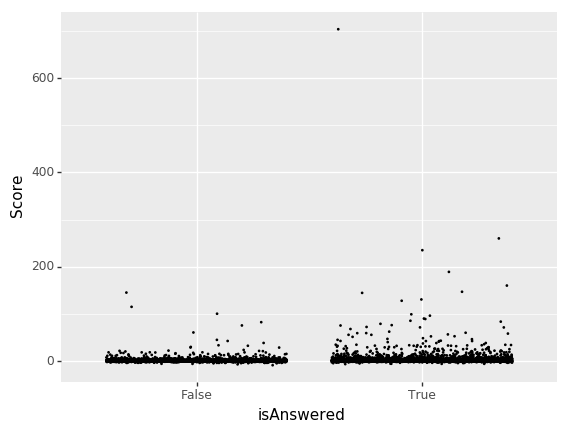

<ggplot: (-9223363299334957077)>
ViewCount


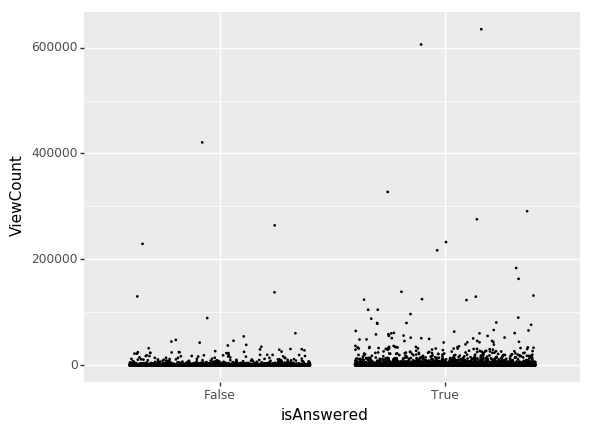

<ggplot: (-9223363299334957203)>
WordCount


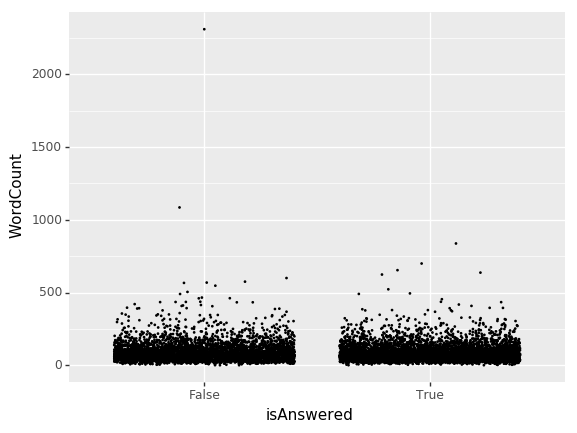

<ggplot: (8737519818735)>
LinksCount


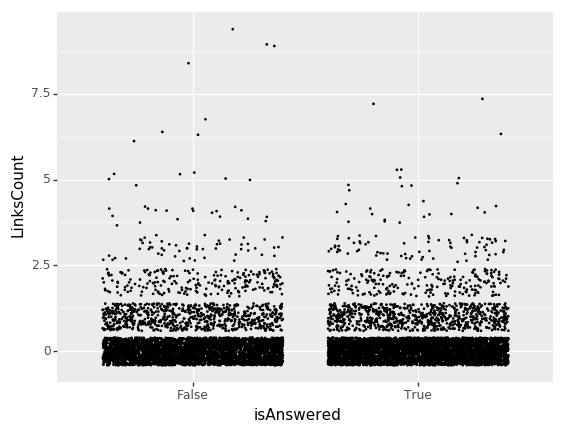

<ggplot: (8737519818728)>
BlocksCount


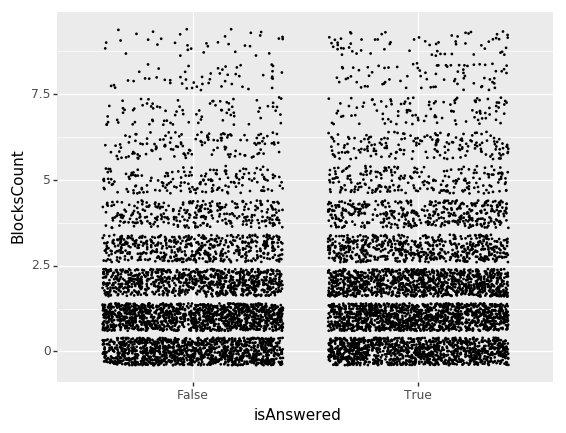

<ggplot: (8737519818609)>
TitleWordsCount


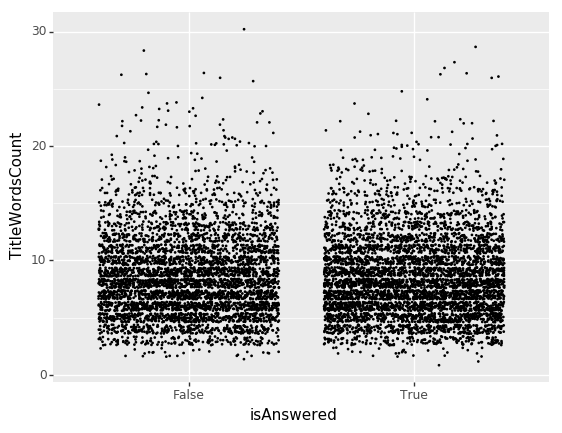

<ggplot: (8737553284265)>
AnswerCount


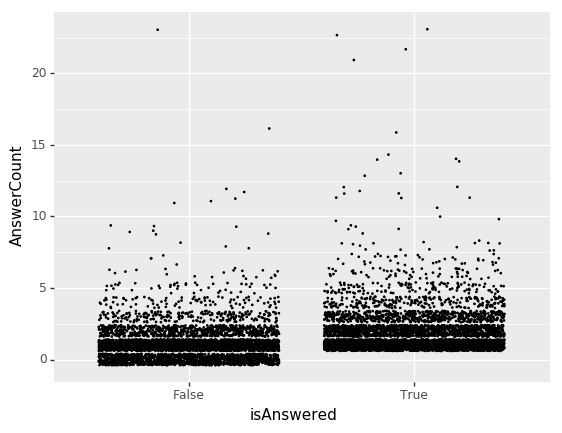

<ggplot: (-9223363299334698415)>
CommentCount


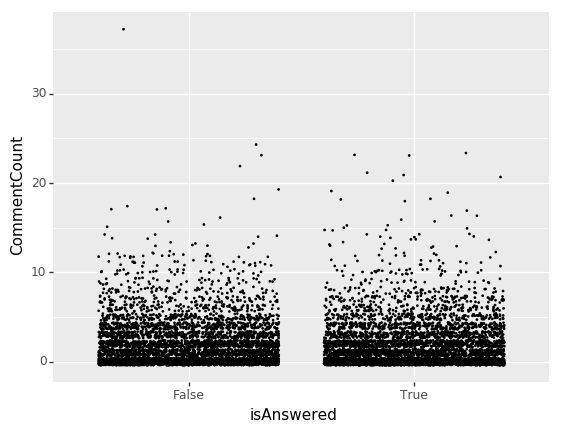

<ggplot: (8737553138254)>
bounty


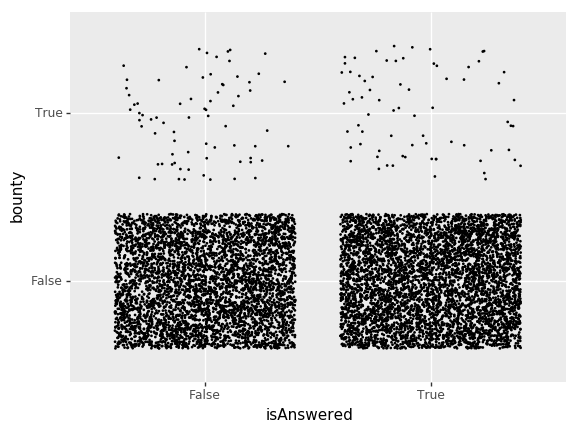

<ggplot: (-9223363299334777235)>
Reputation


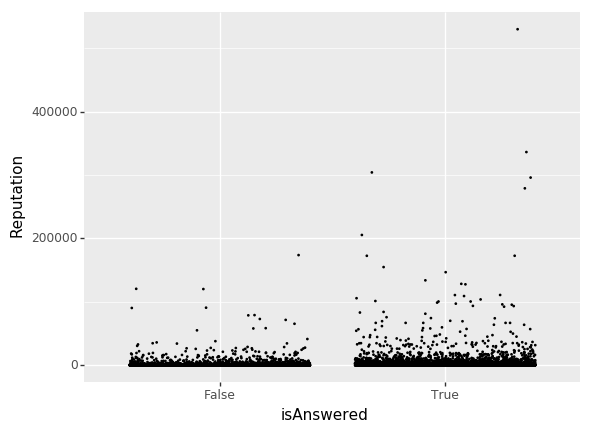

<ggplot: (8737519735437)>
Views


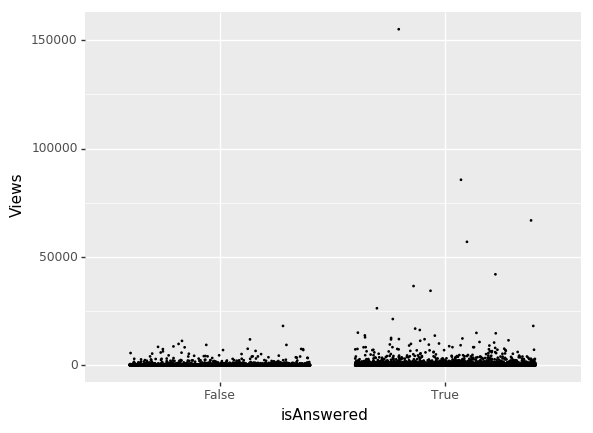

<ggplot: (8737519735381)>
UpVotes


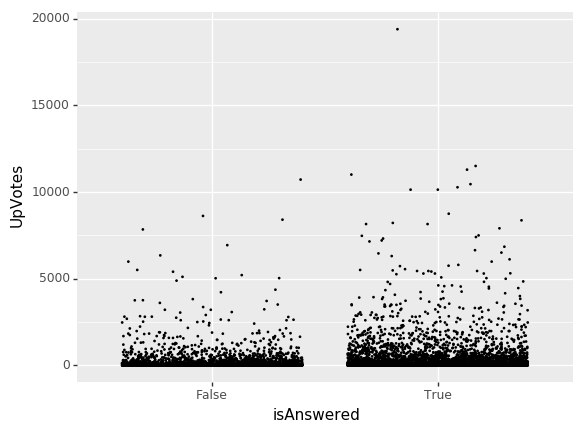

<ggplot: (-9223363299335040263)>
DownVotes


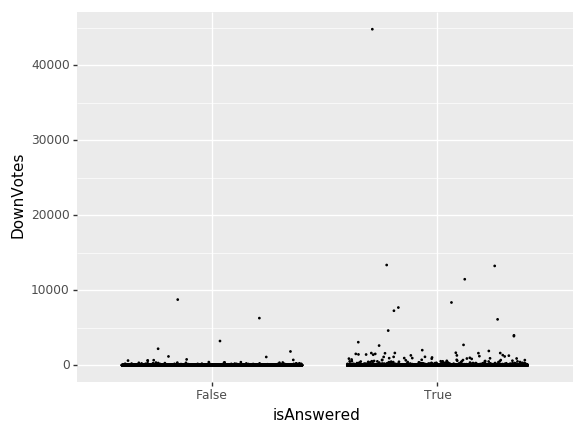

<ggplot: (8737519744439)>
BadgesCount


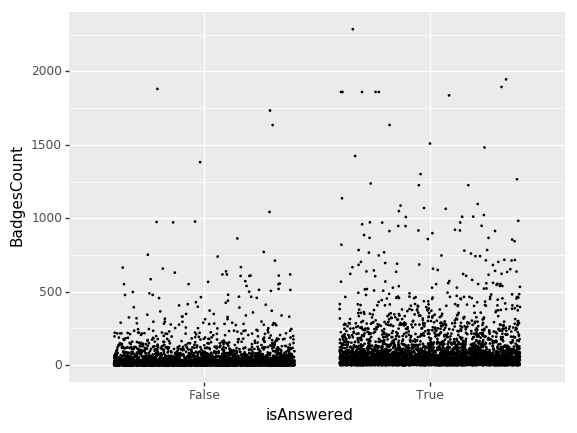

<ggplot: (8737456893886)>
tagsAggregate


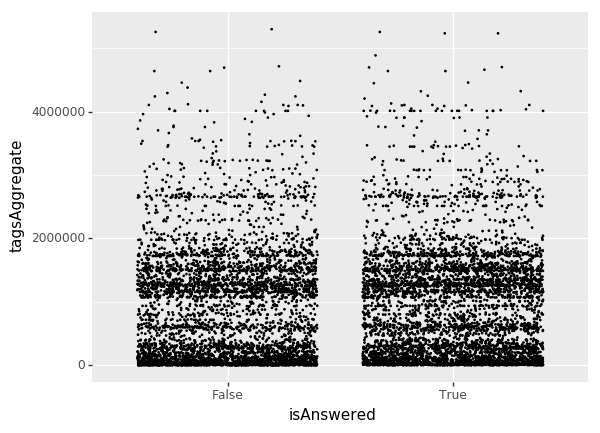

<ggplot: (-9223363299334756762)>


In [9]:
# plot random sample of 10000 points 
temp_df = df.sample(n=10000)
for column in df:
    if column != "isAnswered":
        print(column)
        plot = ggplot(temp_df, aes(x="isAnswered", y=column))
        plot += geom_jitter(size=0.1)
        print(plot)

# More plots

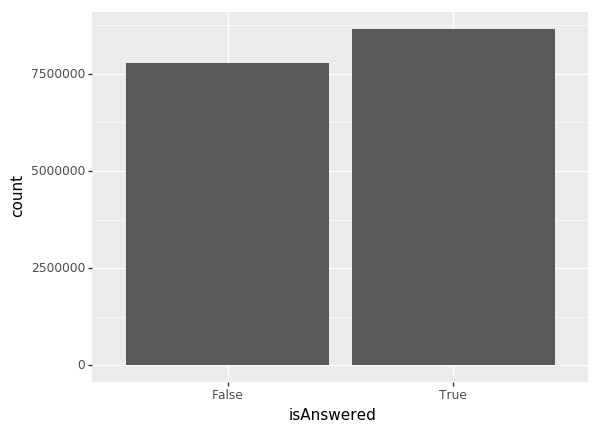

<ggplot: (8737519817413)>

In [10]:
#do not re-run this
plot = ggplot(df, aes(x="isAnswered"))
plot += geom_bar()
plot

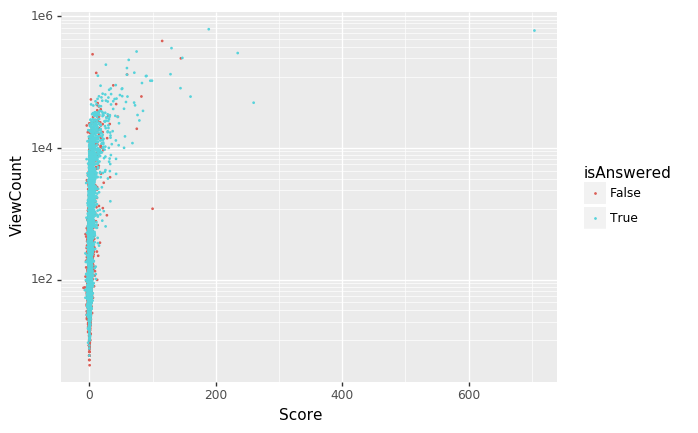

<ggplot: (-9223363299402912070)>

In [11]:
plot = ggplot(temp_df, aes(x="Score", y="ViewCount", color="isAnswered"))
plot += geom_jitter(size=0.1)
plot += scale_y_log10()
plot

/usr/lib64/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/usr/lib64/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/home/wojtek/.local/lib/python3.6/site-packages/plotnine/layer.py:449: UserWarning: geom_jitter : Removed 487 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


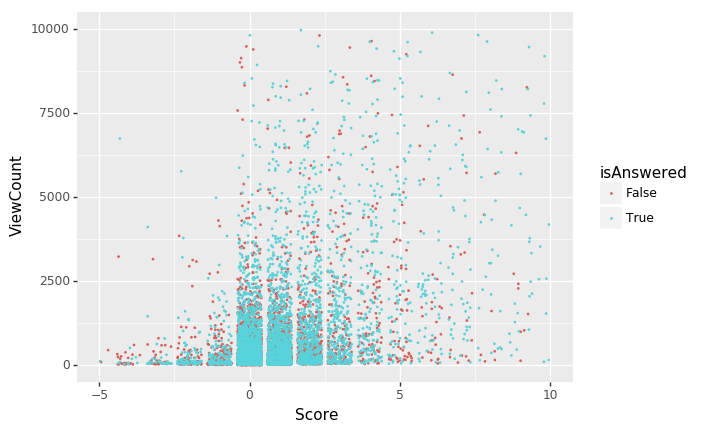

<ggplot: (8737451863609)>

In [12]:
plot = ggplot(temp_df, aes(x="Score", y="ViewCount", color="isAnswered"))
plot += xlim(-5,10)
plot += ylim(0,10000)
plot += geom_jitter(size=0.1)
plot

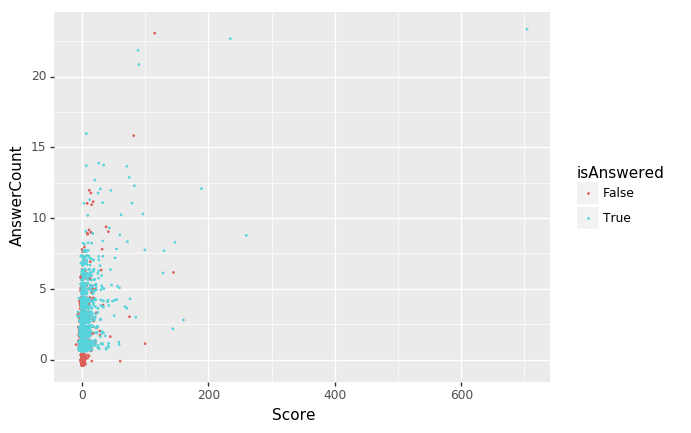

<ggplot: (8737451894739)>

In [13]:
plot = ggplot(temp_df, aes(x="Score", y="AnswerCount", color="isAnswered"))
plot += geom_jitter(size=0.1)
plot

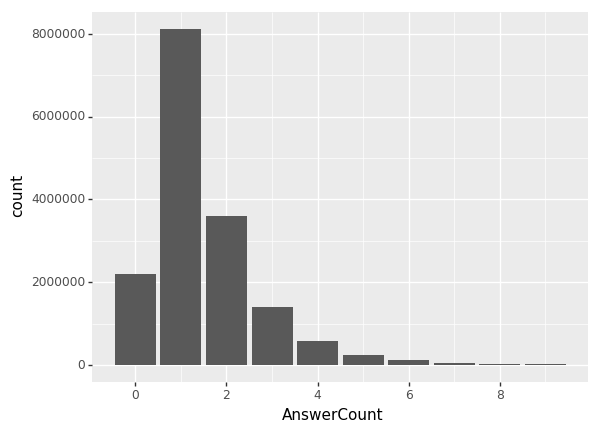

<ggplot: (-9223363299334957161)>

In [14]:
#do not re-run this
plot = ggplot(df.loc[df["AnswerCount"]<10], aes(x="AnswerCount"))
plot += geom_bar()
plot += scale_x_continuous(breaks=range(0,10,2))
plot

In [15]:
# TODO caluclate number of posts with 0 answers
sum(df["AnswerCount"]==0)

2201947

/usr/lib64/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/usr/lib64/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/home/wojtek/.local/lib/python3.6/site-packages/plotnine/layer.py:449: UserWarning: geom_jitter : Removed 404 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


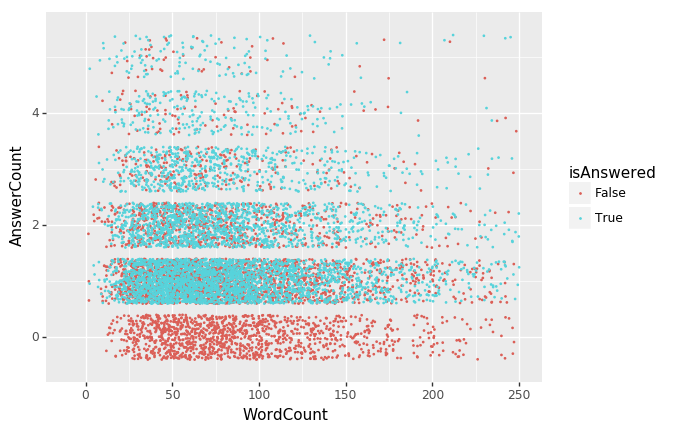

<ggplot: (8737456728349)>

In [16]:
plot = ggplot(temp_df, aes(x="WordCount", y="AnswerCount", color="isAnswered"))
plot += xlim(-10, 250)
plot += ylim(-0.5,5.5)
plot += geom_jitter(size=0.1)
plot

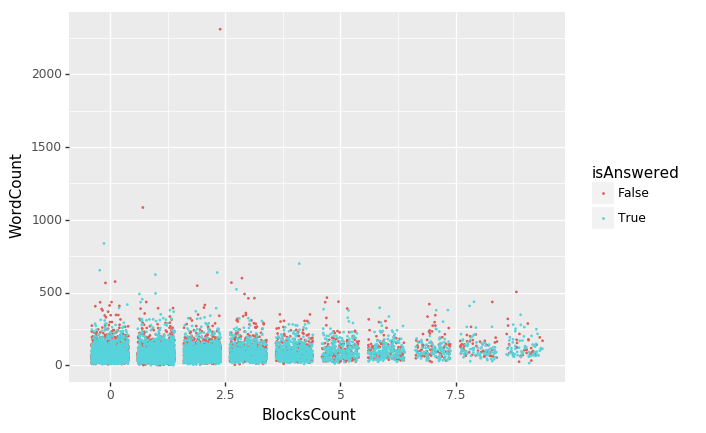

<ggplot: (8737451786153)>

In [17]:
plot = ggplot(temp_df, aes(x="BlocksCount", y="WordCount", color="isAnswered"))
#plot += xlim(-10, 250)
#plot += ylim(-0.5,5.5)
plot += geom_jitter(size=0.1)
plot

/usr/lib64/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/usr/lib64/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/home/wojtek/.local/lib/python3.6/site-packages/plotnine/layer.py:449: UserWarning: geom_jitter : Removed 6163 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


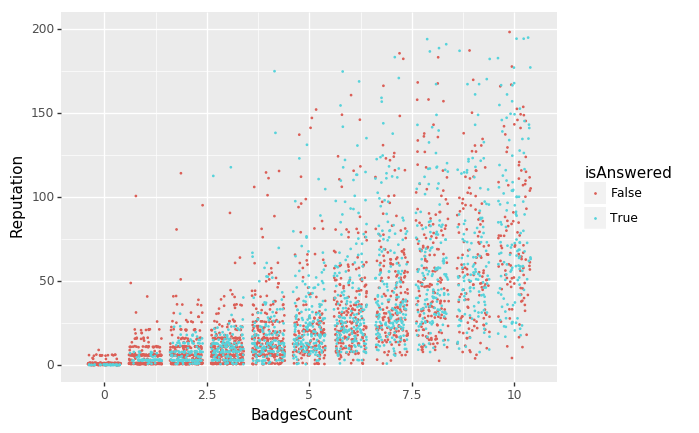

<ggplot: (-9223363299403277859)>

In [18]:
plot = ggplot(temp_df, aes(x="BadgesCount", y="Reputation", color="isAnswered"))
plot += xlim(-0.5,10.5)
plot += ylim(0,200)
plot += geom_jitter(size=0.1)
plot

# Conclusions

In [19]:
sum(df["Score"]>=5)

1245633

In [20]:
sum(df["ViewCount"]>=50)

13953454

In [21]:
Score_treshold = 4

# Ignored posts

In [22]:
# check ignored posts
ignored = df.loc[df["Score"]<Score_treshold]
#ignored = ignored.loc[ignored["ViewCount"]<50]

In [23]:
ignored.describe()

Score     ViewCount     WordCount    LinksCount   BlocksCount  \
count  1.474524e+07  1.474524e+07  1.474524e+07  1.474524e+07  1.474524e+07   
mean   4.784798e-01  7.776552e+02  8.835747e+01  2.859574e-01  1.990906e+00   
std    1.155952e+00  2.014715e+03  6.196382e+01  6.818104e-01  1.963023e+00   
min   -1.850000e+02  1.000000e+00  2.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  6.900000e+01  4.800000e+01  0.000000e+00  1.000000e+00   
50%    0.000000e+00  2.160000e+02  7.300000e+01  0.000000e+00  1.000000e+00   
75%    1.000000e+00  7.000000e+02  1.110000e+02  0.000000e+00  3.000000e+00   
max    3.000000e+00  2.744710e+05  8.020000e+03  9.000000e+00  9.000000e+00   

       TitleWordsCount   AnswerCount  CommentCount    Reputation  \
count     1.474524e+07  1.474524e+07  1.474524e+07  1.474524e+07   
mean      8.586457e+00  1.378259e+00  1.965728e+00  1.910958e+03   
std       3.621450e+00  1.065311e+00  2.637641e+00  9.071141e+03   
min       1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%       6.000000e+00  1.000000e+00  0.000000e+00  2.000000e+01   
50%       8.000000e+00  1.000000e+00  1.000000e+00  1.410000e+02   
75%       1.100000e+01  2.000000e+00  3.000000e+00  9.720000e+02   
max       4.500000e+01  2.400000e+01  1.090000e+02  8.297540e+05   

              Views       UpVotes     DownVotes   BadgesCount  tagsAggregate  
count  1.474524e+07  1.474524e+07  1.474524e+07  1.474524e+07   1.474524e+07  
mean   2.894834e+02  2.189515e+02  2.072217e+01  4.918492e+01   9.579844e+05  
std    1.445625e+03  7.528039e+02  3.073983e+02  1.119491e+02   8.566613e+05  
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00  
25%    9.000000e+00  0.000000e+00  0.000000e+00  5.000000e+00   1.713380e+05  
50%    4.000000e+01  1.700000e+01  0.000000e+00  1.400000e+01   9.053490e+05  
75%    1.780000e+02  1.300000e+02  4.000000e+00  4.600000e+01   1.487400e+06  
max    4.313370e+05  9.054900e+04  6.550000e+04  5.975000e+03   6.680300e+06

In [24]:
ignored.corr()

Score  ViewCount  WordCount  LinksCount  BlocksCount  \
Score            1.000000   0.194282   0.092886    0.042363     0.056226   
ViewCount        0.194282   1.000000   0.002875   -0.012576    -0.010757   
WordCount        0.092886   0.002875   1.000000    0.171615     0.138875   
LinksCount       0.042363  -0.012576   0.171615    1.000000     0.020397   
BlocksCount      0.056226  -0.010757   0.138875    0.020397     1.000000   
TitleWordsCount -0.003857  -0.017940   0.080145    0.010779    -0.007450   
AnswerCount      0.081173   0.227799  -0.059291   -0.067415     0.016073   
CommentCount    -0.099058  -0.019833   0.048479    0.004446     0.103774   
bounty           0.069708   0.013737   0.042173    0.036252     0.017925   
Reputation       0.079142   0.031168   0.014438    0.028585     0.044867   
Views            0.057063   0.028842   0.005825    0.026998     0.039965   
UpVotes          0.082131   0.027677   0.014986    0.055484     0.075725   
DownVotes        0.019934   0.006098   0.012406    0.017644     0.030433   
BadgesCount      0.100172   0.068428  -0.012451    0.023009     0.049665   
tagsAggregate   -0.056684   0.005312   0.001922    0.012401     0.084728   
isAnswered       0.102492   0.094964  -0.015775   -0.010981     0.076479   

                 TitleWordsCount  AnswerCount  CommentCount    bounty  \
Score                  -0.003857     0.081173     -0.099058  0.069708   
ViewCount              -0.017940     0.227799     -0.019833  0.013737   
WordCount               0.080145    -0.059291      0.048479  0.042173   
LinksCount              0.010779    -0.067415      0.004446  0.036252   
BlocksCount            -0.007450     0.016073      0.103774  0.017925   
TitleWordsCount         1.000000    -0.018754     -0.006023  0.003391   
AnswerCount            -0.018754     1.000000     -0.027777  0.035702   
CommentCount           -0.006023    -0.027777      1.000000  0.021415   
bounty                  0.003391     0.035702      0.021415  1.000000   
Reputation              0.008704     0.058594     -0.023773  0.029425   
Views                   0.011274     0.051830     -0.011606  0.030420   
UpVotes                 0.015128     0.051249     -0.013954  0.041633   
DownVotes              -0.001742     0.014338      0.001867  0.014265   
BadgesCount             0.009971     0.100609     -0.037989  0.048736   
tagsAggregate           0.004199     0.106910      0.126706 -0.013186   
isAnswered             -0.015978     0.293753     -0.073852  0.014282   

                 Reputation     Views   UpVotes  DownVotes  BadgesCount  \
Score              0.079142  0.057063  0.082131   0.019934     0.100172   
ViewCount          0.031168  0.028842  0.027677   0.006098     0.068428   
WordCount          0.014438  0.005825  0.014986   0.012406    -0.012451   
LinksCount         0.028585  0.026998  0.055484   0.017644     0.023009   
BlocksCount        0.044867  0.039965  0.075725   0.030433     0.049665   
TitleWordsCount    0.008704  0.011274  0.015128  -0.001742     0.009971   
AnswerCount        0.058594  0.051830  0.051249   0.014338     0.100609   
CommentCount      -0.023773 -0.011606 -0.013954   0.001867    -0.037989   
bounty             0.029425  0.030420  0.041633   0.014265     0.048736   
Reputation         1.000000  0.784635  0.531908   0.354514     0.673647   
Views              0.784635  1.000000  0.502691   0.428854     0.627053   
UpVotes            0.531908  0.502691  1.000000   0.270100     0.553360   
DownVotes          0.354514  0.428854  0.270100   1.000000     0.180044   
BadgesCount        0.673647  0.627053  0.553360   0.180044     1.000000   
tagsAggregate     -0.020145 -0.008512 -0.017084  -0.002454    -0.008286   
isAnswered         0.080757  0.071985  0.115115   0.030697     0.138757   

                 tagsAggregate  isAnswered  
Score                -0.056684    0.102492  
ViewCount             0.005312    0.094964  
WordCount             0.001922   -0.015775  
LinksCount            0.01240

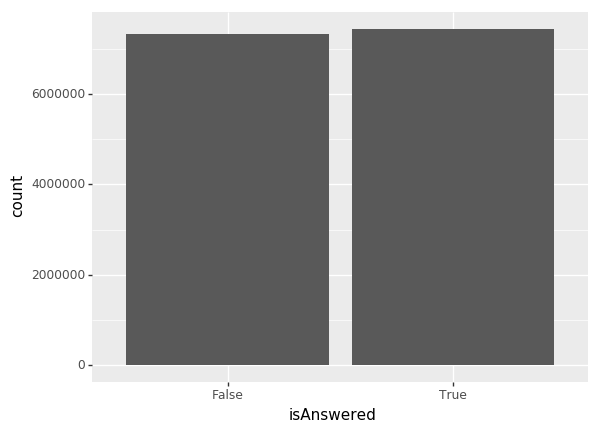

<ggplot: (8737451863686)>

In [25]:
#do not re-run this
plot = ggplot(ignored, aes(x="isAnswered"))
plot += geom_bar()
plot

In [26]:
# how many ignored posts has 0 answers (proportion)
sum(ignored["AnswerCount"]==0)/ignored.shape[0]

0.14665256494551293

In [27]:
sum(ignored["AnswerCount"]==0)

2162428

In [28]:
# proportion of is Answered and number of answers = 0 to total is answered = 0
sum((ignored.loc[ignored["AnswerCount"]==0])["isAnswered"]==0)/sum(ignored["isAnswered"]==0)

0.29555399707801405

Score


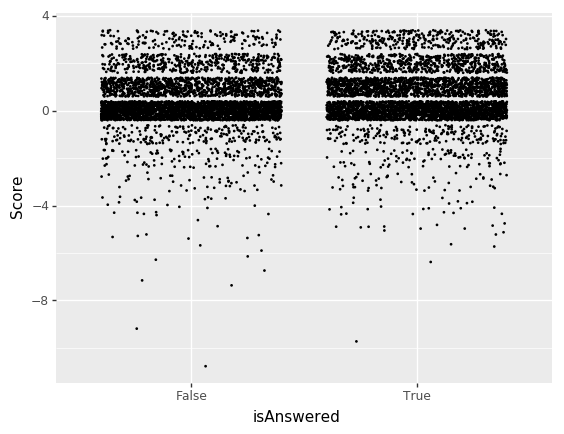

<ggplot: (8737451380684)>
ViewCount


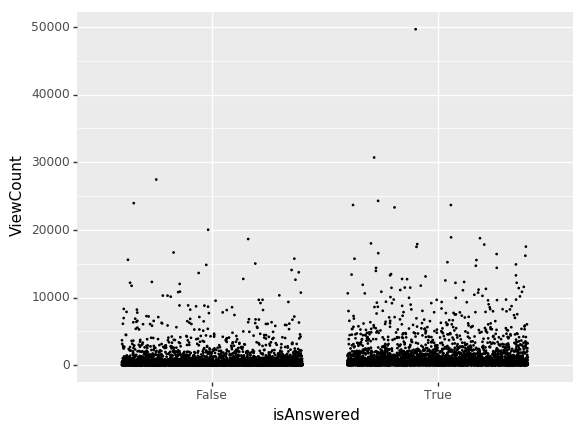

<ggplot: (8737451380698)>
WordCount


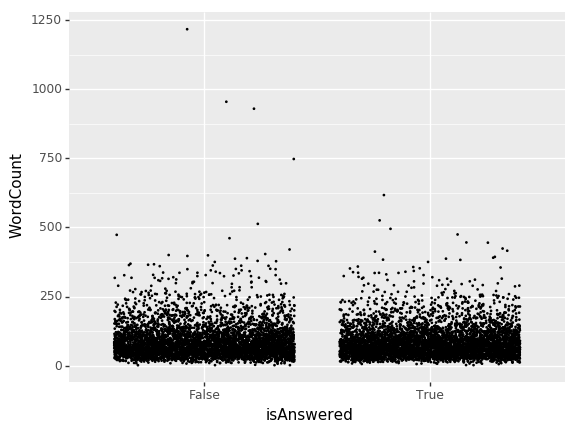

<ggplot: (-9223363299403265781)>
LinksCount


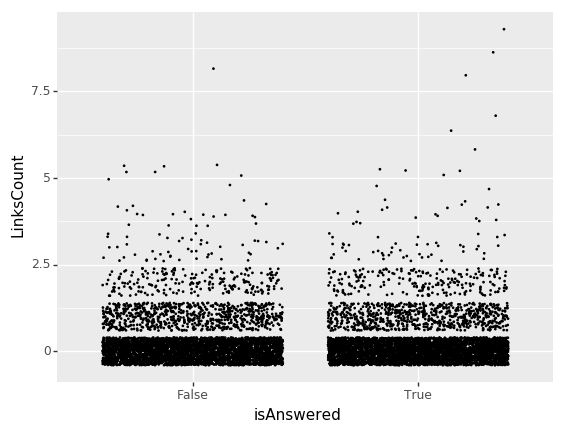

<ggplot: (-9223363299403289831)>
BlocksCount


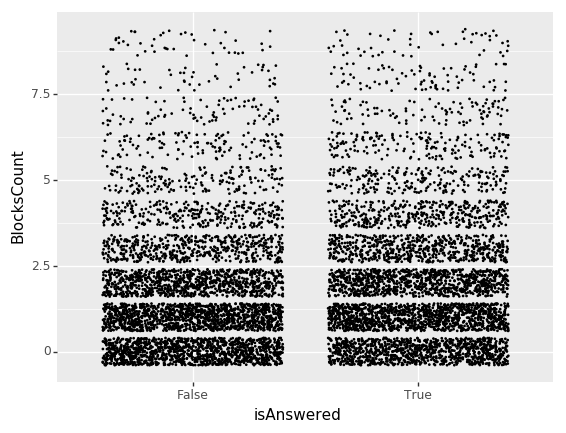

<ggplot: (-9223363299403184352)>
TitleWordsCount


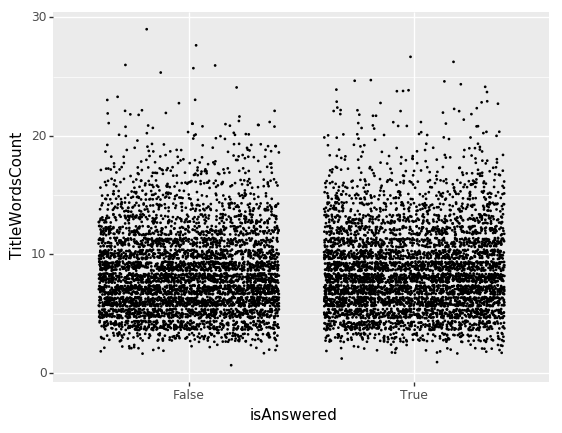

<ggplot: (-9223363299403267903)>
AnswerCount


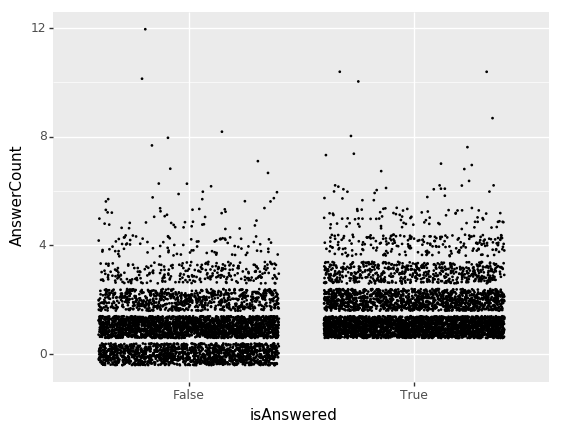

<ggplot: (-9223363299335178492)>
CommentCount


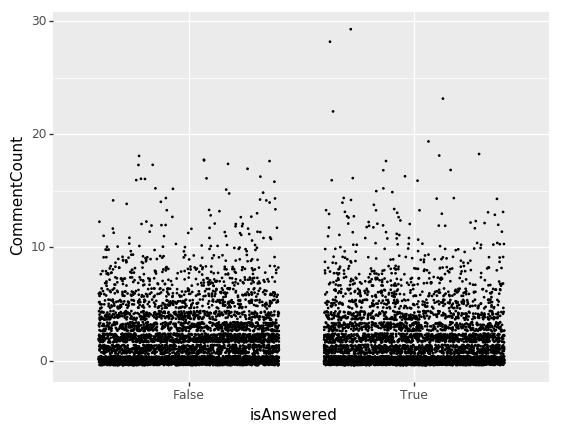

<ggplot: (-9223363299334921037)>
bounty


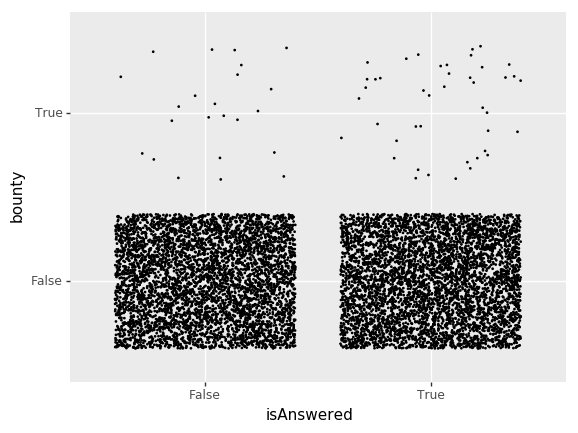

<ggplot: (-9223363299334836669)>
Reputation


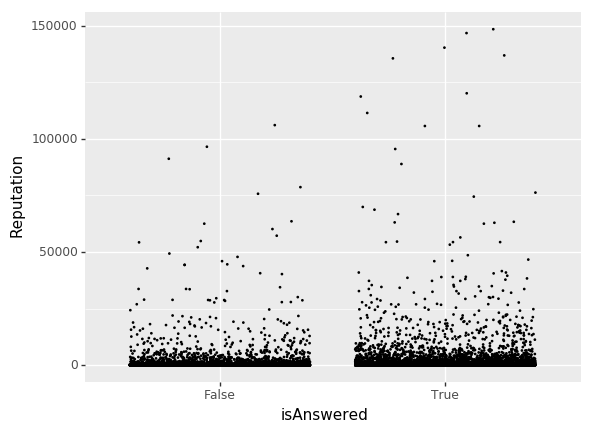

<ggplot: (8737553290104)>
Views


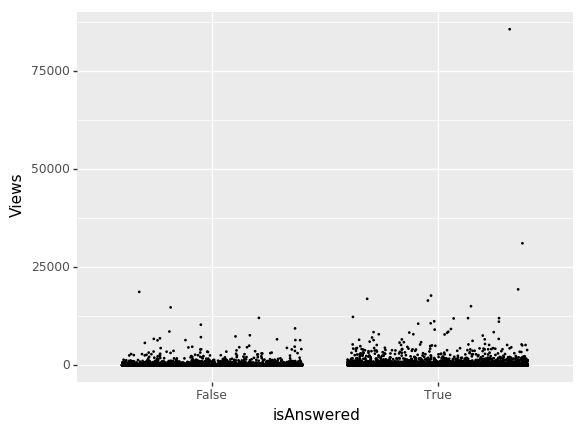

<ggplot: (8737456817107)>
UpVotes


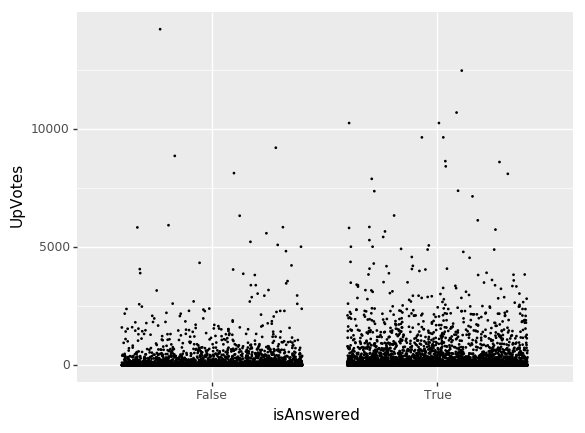

<ggplot: (-9223363299334962821)>
DownVotes


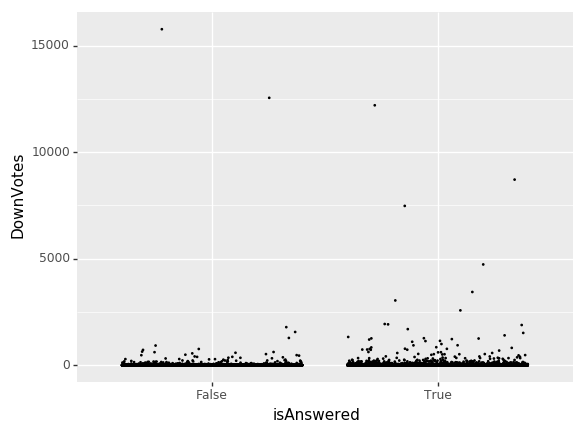

<ggplot: (-9223363299334957217)>
BadgesCount


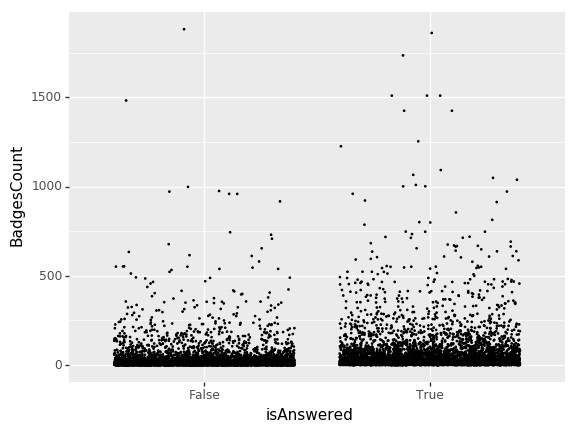

<ggplot: (8737451508719)>
tagsAggregate


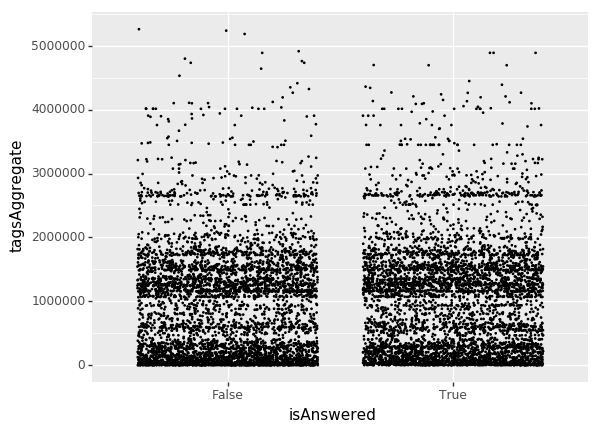

<ggplot: (8737451589815)>


In [29]:
temp_ii = ignored.sample(n=10000)
for column in ignored:
    if column != "isAnswered":
        print(column)
        plot = ggplot(temp_ii, aes(x="isAnswered", y=column))
        plot += geom_jitter(size=0.1)
        print(plot)

/usr/lib64/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/usr/lib64/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/home/wojtek/.local/lib/python3.6/site-packages/plotnine/layer.py:449: UserWarning: geom_jitter : Removed 819 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


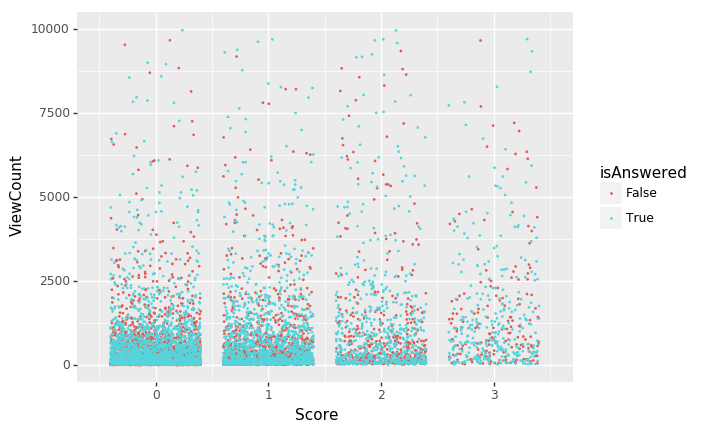

<ggplot: (-9223363299402934542)>

In [30]:
plot = ggplot(temp_ii, aes(x="Score", y="ViewCount", color="isAnswered"))
plot += xlim(-0.5,Score_treshold - 0.5)
plot += ylim(0,10000)
plot += geom_jitter(size=0.1)
plot

/usr/lib64/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/usr/lib64/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/home/wojtek/.local/lib/python3.6/site-packages/plotnine/layer.py:449: UserWarning: geom_jitter : Removed 797 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


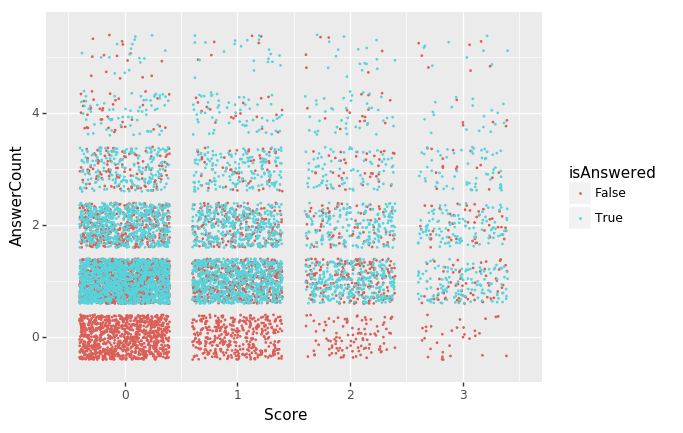

<ggplot: (-9223363299397866485)>

In [31]:
plot = ggplot(temp_ii, aes(x="Score", y="AnswerCount", color="isAnswered"))
plot += xlim(-0.5,Score_treshold - 0.5)
plot += ylim(-0.5,5.5)
plot += geom_jitter(size=0.1)
plot

/usr/lib64/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/usr/lib64/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/home/wojtek/.local/lib/python3.6/site-packages/plotnine/layer.py:449: UserWarning: geom_jitter : Removed 270 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


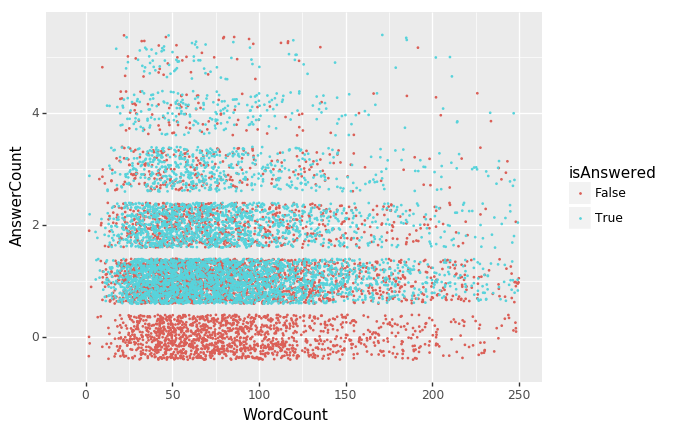

<ggplot: (8737456913216)>

In [32]:
plot = ggplot(temp_ii, aes(x="WordCount", y="AnswerCount", color="isAnswered"))
plot += xlim(-10, 250)
plot += ylim(-0.5,5.5)
plot += geom_jitter(size=0.1)
plot

# Not ignored posts

In [33]:
# remove ignored posts
notignored = df.loc[df["Score"]>=Score_treshold]
#df = df.loc[df["ViewCount"]>=50]

In [34]:
notignored.describe()

Score     ViewCount     WordCount    LinksCount   BlocksCount  \
count  1.674409e+06  1.674409e+06  1.674409e+06  1.674409e+06  1.674409e+06   
mean   1.461793e+01  1.383397e+04  9.580631e+01  3.745154e-01  2.070607e+00   
std    8.087283e+01  4.306046e+04  7.625530e+01  8.450082e-01  2.161448e+00   
min    4.000000e+00  1.600000e+01  2.000000e+00  0.000000e+00  0.000000e+00   
25%    4.000000e+00  1.110000e+03  4.800000e+01  0.000000e+00  0.000000e+00   
50%    6.000000e+00  3.726000e+03  7.600000e+01  0.000000e+00  1.000000e+00   
75%    1.100000e+01  1.140200e+04  1.200000e+02  0.000000e+00  3.000000e+00   
max    2.225200e+04  3.913031e+06  3.872000e+03  9.000000e+00  9.000000e+00   

       TitleWordsCount   AnswerCount  CommentCount    Reputation  \
count     1.674409e+06  1.674409e+06  1.674409e+06  1.674409e+06   
mean      8.484499e+00  2.927277e+00  2.000313e+00  7.054242e+03   
std       3.438284e+00  2.484000e+00  2.863485e+00  2.469005e+04   
min       1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%       6.000000e+00  1.000000e+00  0.000000e+00  2.480000e+02   
50%       8.000000e+00  2.000000e+00  1.000000e+00  1.157000e+03   
75%       1.000000e+01  4.000000e+00  3.000000e+00  4.775000e+03   
max       3.300000e+01  2.400000e+01  1.030000e+02  1.070456e+06   

              Views       UpVotes     DownVotes   BadgesCount  tagsAggregate  
count  1.674409e+06  1.674409e+06  1.674409e+06  1.674409e+06   1.674409e+06  
mean   9.187748e+02  5.475292e+02  6.632461e+01  1.119237e+02   8.687530e+05  
std    8.344630e+03  1.391423e+03  6.878212e+02  2.107294e+02   7.592687e+05  
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00  
25%    4.000000e+01  1.600000e+01  0.000000e+00  1.700000e+01   1.521490e+05  
50%    1.660000e+02  1.120000e+02  3.000000e+00  4.700000e+01   7.314060e+05  
75%    5.960000e+02  4.960000e+02  1.700000e+01  1.200000e+02   1.364141e+06  
max    1.723431e+06  9.054900e+04  6.550000e+04  1.689900e+04   6.121273e+06

In [35]:
notignored.corr()

Score  ViewCount  WordCount  LinksCount  BlocksCount  \
Score            1.000000   0.462327  -0.025394   -0.004406    -0.005354   
ViewCount        0.462327   1.000000  -0.084493   -0.041146    -0.021892   
WordCount       -0.025394  -0.084493   1.000000    0.264755     0.159001   
LinksCount      -0.004406  -0.041146   0.264755    1.000000     0.068341   
BlocksCount     -0.005354  -0.021892   0.159001    0.068341     1.000000   
TitleWordsCount  0.002114  -0.011034   0.088662    0.026970     0.010197   
AnswerCount      0.217585   0.418272  -0.053240   -0.058550    -0.080109   
CommentCount     0.032195   0.002213   0.139775    0.076324     0.118237   
bounty           0.007459  -0.052887   0.141472    0.135308     0.069768   
Reputation       0.067622   0.029227   0.021127    0.049979     0.048491   
Views            0.030746   0.010661   0.015265    0.027753     0.021589   
UpVotes          0.040979   0.007051   0.014392    0.080479     0.069308   
DownVotes        0.011072   0.000723   0.018504    0.032669     0.036400   
BadgesCount      0.049709   0.053113  -0.025817    0.035905     0.025238   
tagsAggregate    0.007533   0.042746   0.007240    0.018177     0.066039   
isAnswered       0.033870   0.066538  -0.065348   -0.041954     0.032100   

                 TitleWordsCount  AnswerCount  CommentCount    bounty  \
Score                   0.002114     0.217585      0.032195  0.007459   
ViewCount              -0.011034     0.418272      0.002213 -0.052887   
WordCount               0.088662    -0.053240      0.139775  0.141472   
LinksCount              0.026970    -0.058550      0.076324  0.135308   
BlocksCount             0.010197    -0.080109      0.118237  0.069768   
TitleWordsCount         1.000000    -0.008044      0.012222  0.028167   
AnswerCount            -0.008044     1.000000      0.060277 -0.024780   
CommentCount            0.012222     0.060277      1.000000  0.147388   
bounty                  0.028167    -0.024780      0.147388  1.000000   
Reputation              0.015695     0.070472      0.020728  0.007574   
Views                   0.010721     0.026319      0.019281  0.008406   
UpVotes                 0.027381     0.043992      0.028832  0.026386   
DownVotes               0.002961     0.007991      0.026126  0.017586   
BadgesCount             0.021902     0.099816      0.000409  0.018290   
tagsAggregate          -0.008982     0.067698      0.100863  0.020019   
isAnswered             -0.008885     0.102050     -0.079907 -0.121115   

                 Reputation     Views   UpVotes  DownVotes  BadgesCount  \
Score              0.067622  0.030746  0.040979   0.011072     0.049709   
ViewCount          0.029227  0.010661  0.007051   0.000723     0.053113   
WordCount          0.021127  0.015265  0.014392   0.018504    -0.025817   
LinksCount         0.049979  0.027753  0.080479   0.032669     0.035905   
BlocksCount        0.048491  0.021589  0.069308   0.036400     0.025238   
TitleWordsCount    0.015695  0.010721  0.027381   0.002961     0.021902   
AnswerCount        0.070472  0.026319  0.043992   0.007991     0.099816   
CommentCount       0.020728  0.019281  0.028832   0.026126     0.000409   
bounty             0.007574  0.008406  0.026386   0.017586     0.018290   
Reputation         1.000000  0.542938  0.571794   0.362134     0.737272   
Views              0.542938  1.000000  0.278282   0.267839     0.578604   
UpVotes            0.571794  0.278282  1.000000   0.291761     0.551016   
DownVotes          0.362134  0.267839  0.291761   1.000000     0.220469   
BadgesCount        0.737272  0.578604  0.551016   0.220469     1.000000   
tagsAggregate     -0.007010 -0.000448 -0.008099   0.000908     0.009859   
isAnswered         0.070808  0.026863  0.105211   0.024963     0.111642   

                 tagsAggregate  isAnswered  
Score                 0.007533    0.033870  
ViewCount             0.042746    0.066538  
WordCount             0.007240   -0.065348  
LinksCount            0.01817

In [36]:
# how many ignored posts has 0 answers (proportion)
sum(notignored["AnswerCount"]==0)/notignored.shape[0]

0.02360176038231997

In [37]:
sum(notignored["AnswerCount"]==0)

39519

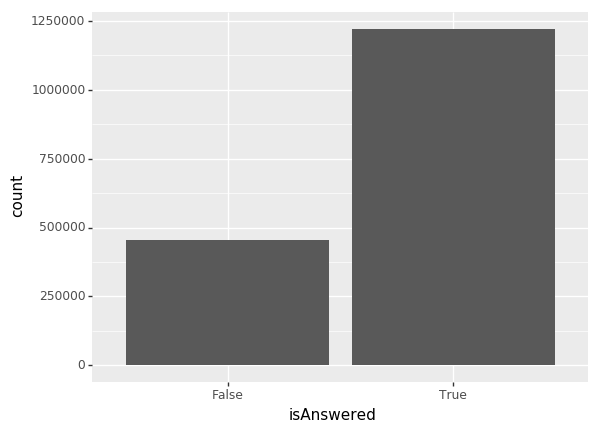

<ggplot: (-9223363299403859347)>

In [38]:
#do not re-run this
plot = ggplot(notignored, aes(x="isAnswered"))
plot += geom_bar()
plot

In [39]:
# proportion answered to not answered
sum(notignored["isAnswered"]==1)/sum(notignored["isAnswered"]==0)

2.6860065028694957

In [40]:
# proportion of is Answered and number of answers = 0 to total is answered = 0
sum((notignored.loc[notignored["AnswerCount"]==0])["isAnswered"]==0)/sum(notignored["isAnswered"]==0)

0.08699183949315481

Score


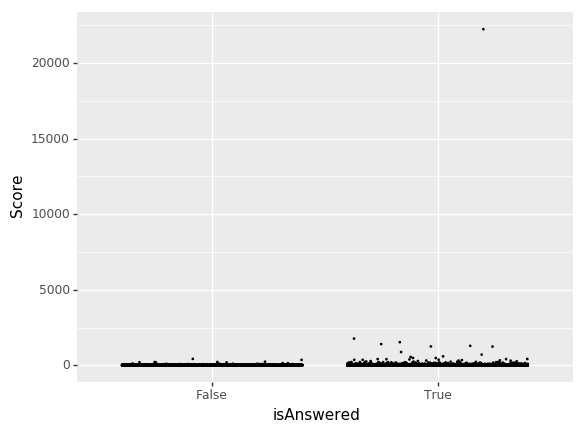

<ggplot: (8737451487850)>
ViewCount


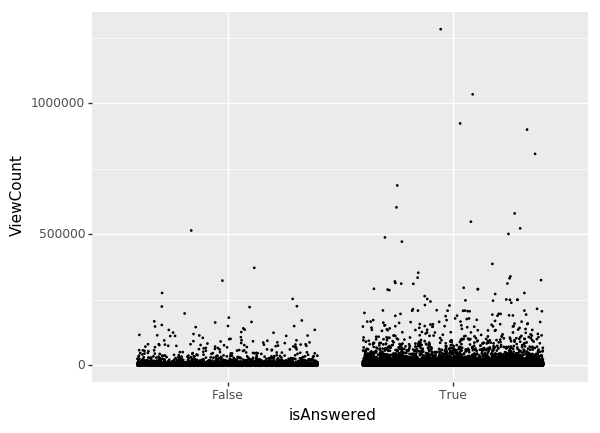

<ggplot: (-9223363299397862277)>
WordCount


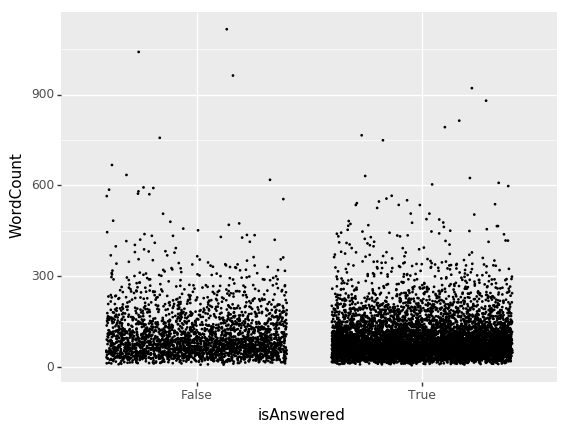

<ggplot: (8737451512121)>
LinksCount


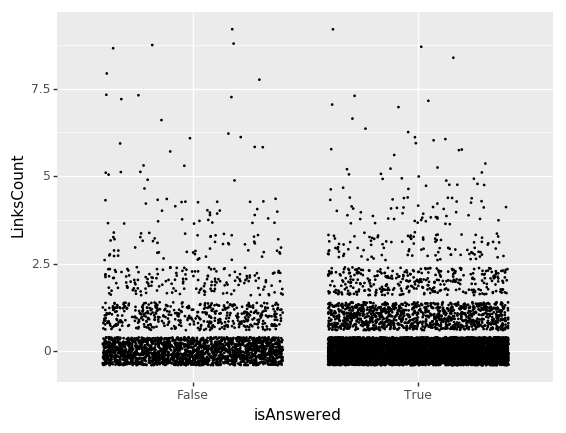

<ggplot: (-9223363299403431336)>
BlocksCount


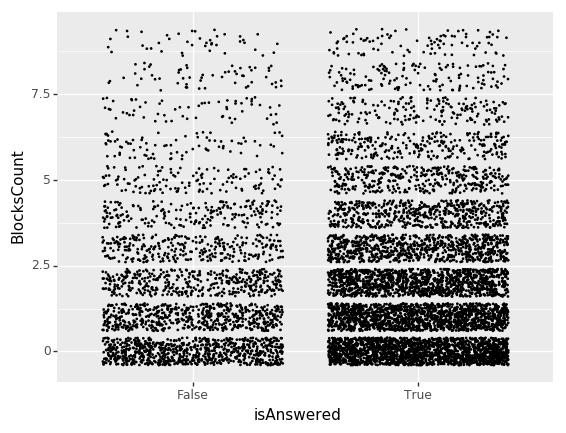

<ggplot: (8737456909334)>
TitleWordsCount


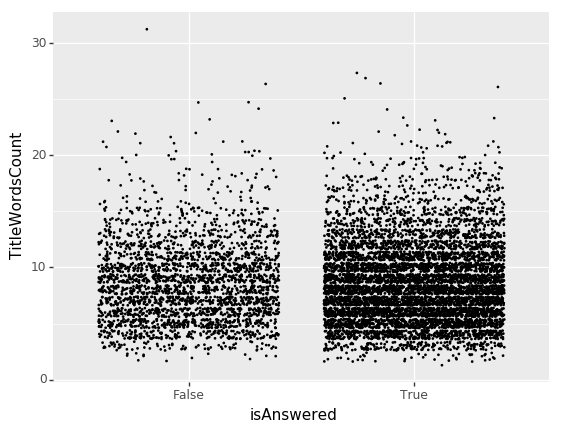

<ggplot: (-9223363299403266146)>
AnswerCount


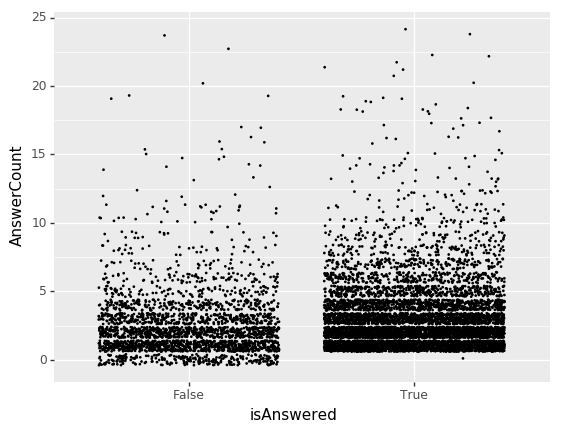

<ggplot: (-9223363299402966966)>
CommentCount


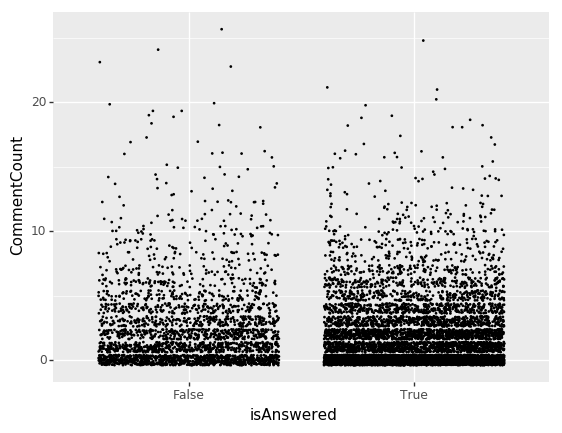

<ggplot: (-9223363299334865369)>
bounty


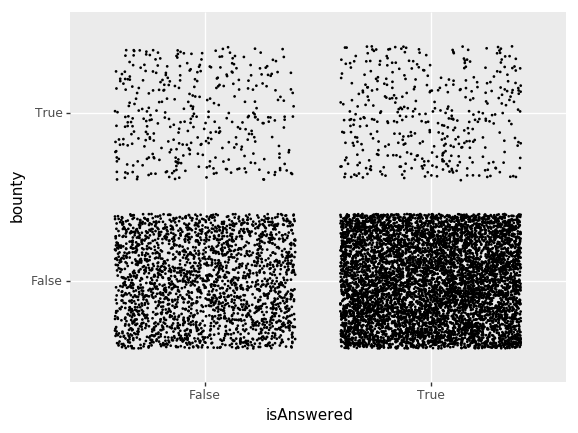

<ggplot: (8737451842715)>
Reputation


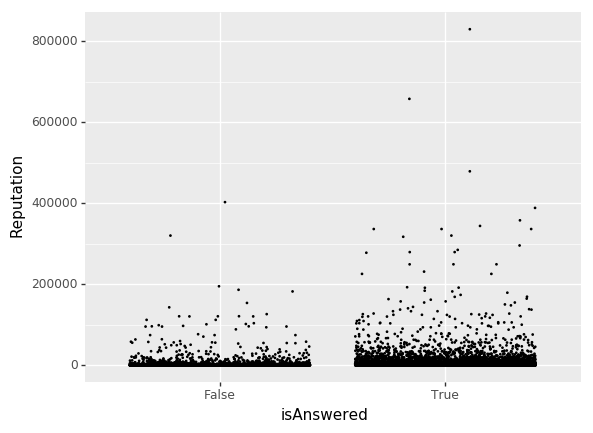

<ggplot: (8737519910471)>
Views


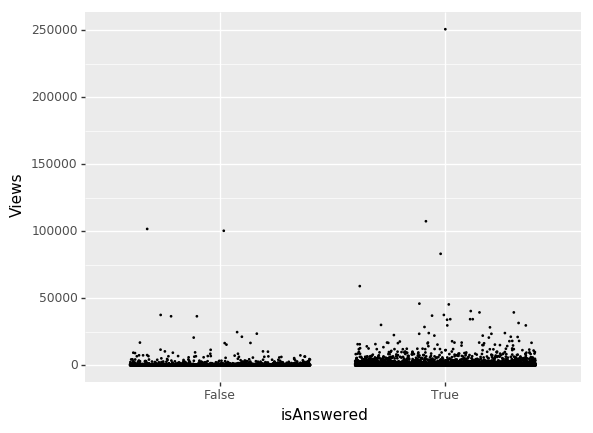

<ggplot: (-9223363299397867155)>
UpVotes


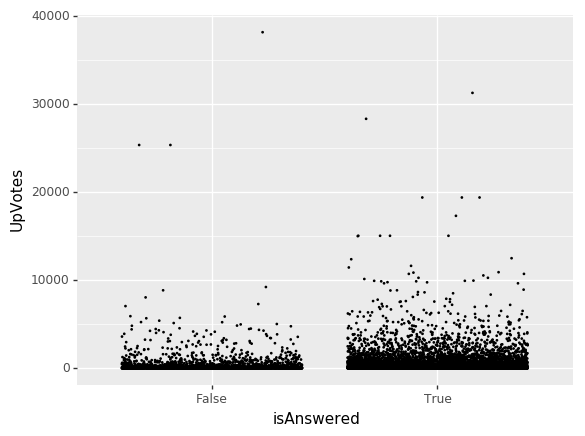

<ggplot: (8737456906167)>
DownVotes


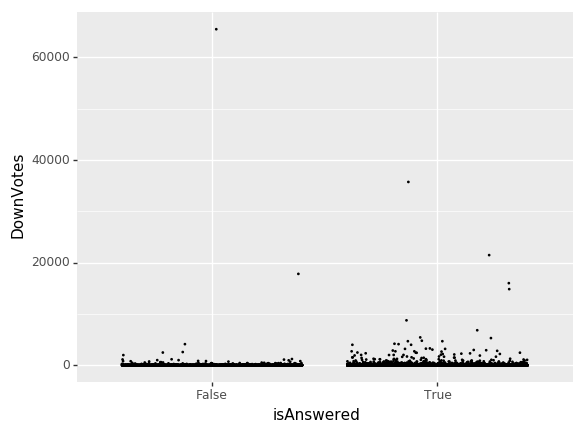

<ggplot: (8737456916933)>
BadgesCount


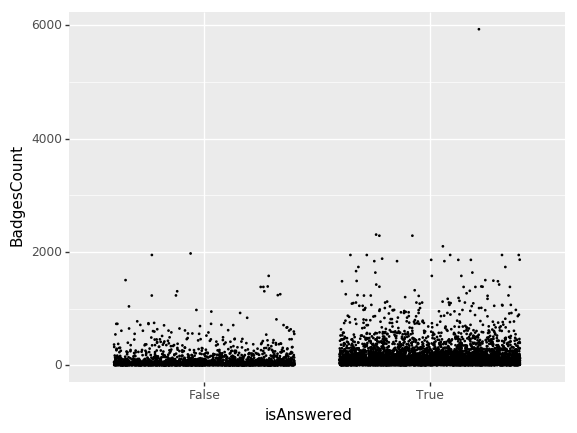

<ggplot: (8737451516031)>
tagsAggregate


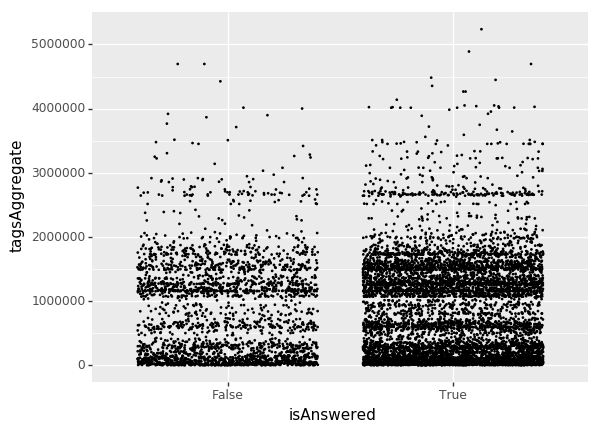

<ggplot: (-9223363299397864539)>


In [41]:
temp_ni = notignored.sample(n=10000)
for column in notignored:
    if column != "isAnswered":
        print(column)
        plot = ggplot(temp_ni, aes(x="isAnswered", y=column))
        plot += geom_jitter(size=0.1)
        print(plot)

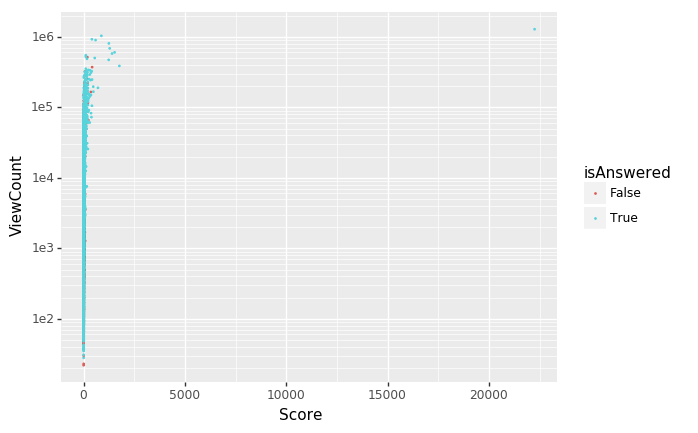

<ggplot: (8737450915974)>

In [42]:
plot = ggplot(temp_ni, aes(x="Score", y="ViewCount", color="isAnswered"))
plot += geom_jitter(size=0.1)
plot += scale_y_log10()
plot

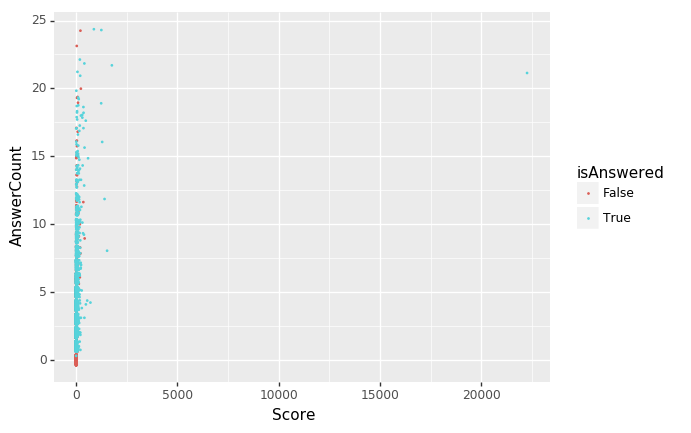

<ggplot: (-9223363299403123831)>

In [43]:
plot = ggplot(temp_ni, aes(x="Score", y="AnswerCount", color="isAnswered"))
plot += geom_jitter(size=0.1)
plot